In [1]:
import pandas as pd 
from charts import histogram
datei_name = "animal_dataset_bc.csv"
animal_table = pd.read_csv(datei_name,
                        header=0,
                        names=["Name", "Spezies", "Geschlecht", "Alter", "Steril", "Beine", "Gewicht", "Wochen"], 
                        index_col=0)

wochen = animal_table["Wochen"]
gewicht = animal_table["Gewicht"]

In [2]:
type(wochen)

pandas.core.series.Series

**Mittelwerte berechnen:** Hier soll untersucht werden, ob Mittelwerte mit der mean-Funktion von pandas oder einer eigenen (Summe/Länge) berechnet werden soll.

In [3]:
def mean_pandas(row: pd.Series):
    return row.mean()

In [4]:
def mean_with_sum(row: pd.Series):
    return row.sum()/len(row)

In [5]:
print(mean_pandas(gewicht))
print(mean_with_sum(gewicht))

39.71562499999998
39.715625


Ein Vergleich der beiden mean-Funktionen ergab folgendes:
[5.1633686999999995, 4.9391852, 4.989247599999999, 4.7609285, 5.213527500000001]
[5.016166300000002, 4.830162900000001, 4.7145829999999975, 4.778973199999996, 5.4725702]
(siehe Zu1011function.py, compare_mean).

Schluss: Es scheint keine Rolle zu spielen, welche Funktion verwendet wird.

**Korrelation:** Hier soll untersucht werden, ob die Korrelation von Hand oder mit pandas berechnet werden soll.

In [6]:
def correlation_with_sums(x, y):
    n = len(x)
    mean_x = x.mean()
    mean_y = y.mean()
    x_i_minus_mean_x = [x_i - mean_x for x_i in x]
    y_i_minus_mean_y = [y_i - mean_y for y_i in y]

    cov_without_den = sum([x_i_minus_mean_x[i]*y_i_minus_mean_y[i] for i in range(n)])

    std_dev_x = sum([el**2 for el in x_i_minus_mean_x])
    std_dev_y = sum([el**2 for el in y_i_minus_mean_y])

    return cov_without_den/((std_dev_x* std_dev_y)**0.5)

In [7]:
correlation_with_sums(gewicht, wochen)

0.648176449402253

In [8]:
from charts import r_value
r_value(animal_table, "Gewicht", "Wochen")

0.648176449402253

In [9]:
def correlation_with_sums(table, col1, col2):
    x= table[col1]
    y=table[col2]
    n = len(x)
    mean_x = x.mean()
    mean_y = y.mean()
    x_i_minus_mean_x = [x_i - mean_x for x_i in x]
    y_i_minus_mean_y = [y_i - mean_y for y_i in y]

    cov_without_den = sum([x_i_minus_mean_x[i]*y_i_minus_mean_y[i] for i in range(n)])

    std_dev_x = sum([el**2 for el in x_i_minus_mean_x])
    std_dev_y = sum([el**2 for el in y_i_minus_mean_y])

    return cov_without_den/((std_dev_x* std_dev_y)**0.5)

In [10]:
correlation_with_sums(animal_table, "Gewicht", "Wochen")

0.648176449402253

Ein Vergleich der beiden Korrelationsfunktionen-Funktionen ergab folgendes:
[19.847672300000003, 20.342938, 20.3154167, 20.842778199999998, 20.33035629999999]
[26.916647399999988, 27.41866810000002, 27.347218800000007, 26.021781199999992, 25.664112499999987]
(siehe Zu1011function.py, compare_corr).

Schluss: Die Funktion r_value in charts, welche eine Tablle aus den beiden Spalten von Interesse bastelt und dann die corr-Funktion von pandas verwendet ist etwa 20% schneller als die Funktion correlation_with_sums, welche den Korrelationskoeffizienten mit der Formel mit Hilfe von Summen und List Comprehensions berechenet.
Der Vorteil von correlation_with_sums könnte aber sein, dass, falls die Regressionsgerade mit Hilfe der Formel berechnet wird, Teile der Berechnung der Steigung m sowieso für die Berechnung von r benötigt werden. Zudem ist eine Abhängigkeit von pandas weniger.

**Lineare Regression:**

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [18]:
#Mit numpy, sklearn

def lr_plot(table, col1, col2):
    x = table[[col1]]
    y = table[[col2]]
    regressor = LinearRegression()
    linear_model = regressor.fit(x, y)
    m = round(float(linear_model.coef_),3)
    q = round(float(linear_model.intercept_),3)
    r = round(r_value(table, col1, col2),3)
    y_prediction = regressor.predict(x)
    plt.scatter(x, y, color = 'red')
    plt.plot(x, y_prediction, color = 'blue')
    plt.suptitle(f"Lineare Regression: y = {m}x+{q}, Korrelation: {r}")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [19]:
correlation_with_sums(animal_table, "Alter", "Wochen")

0.44782319360103906

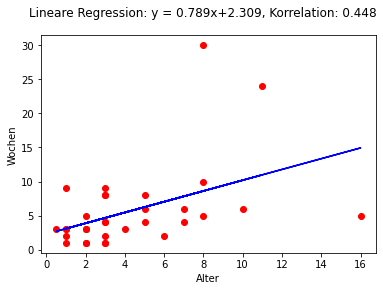

In [20]:
lr_plot(animal_table, "Alter", "Wochen")

TODO: Regressionsgerade selber basteln und vergleichen.